## Multiple-regression - House price study

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Import data (Train and test separate)

In [2]:
house_train = pd.read_csv('../Data/house_data/kc_house_train_data.csv')
house_test = pd.read_csv('../Data/house_data/kc_house_test_data.csv')

### 3. Simple model checks

In [3]:
X_house_train = house_train['sqft_living']
y_house_train = house_train['price']
X_train_shaped = X_house_train.values.reshape(-1, 1)
y_train_shaped = y_house_train.values.reshape(-1, 1)
print("Shape of X-data (training):" + str(X_train_shaped.shape))
print("Shape of Y-data (training):" + str(y_train_shaped.shape))

Shape of X-data (training):(17384, 1)
Shape of Y-data (training):(17384, 1)


### 4. Simple Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_shaped, y_train_shaped)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {}'
     .format(linreg.score(X_train_shaped, y_train_shaped)))

linear model coeff (w): [[281.95883963]]
linear model intercept (b): [-47116.07907289]
R-squared score (training): 0.494091401364954


### 5. Plot the results - Simple Linear Regression

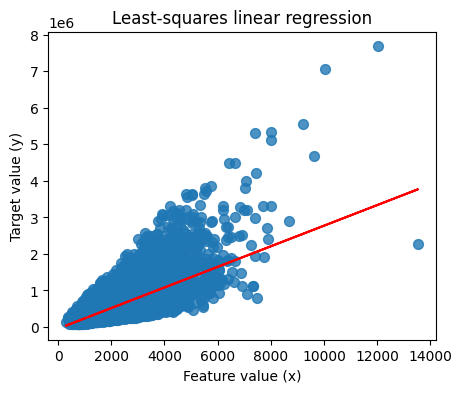

In [5]:
plt.figure(figsize=(5,4))
plt.scatter(X_train_shaped, y_train_shaped, marker= 'o', s=50, alpha=0.8)
plt.plot(X_train_shaped, linreg.coef_ * X_train_shaped + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### 6. Multiple regression features

In [6]:
house_train['bedroom_squared'] = house_train['bedrooms'] * house_train['bedrooms']
house_train.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_squared
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,9
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,16
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,9


In [9]:
# Add other three additional columns also
house_test['bedroom_squared'] = house_test['bedrooms'] * house_test['bedrooms']
#Bed-bathroom multiple
house_train['bed_bath_rooms'] = house_train['bedrooms'] * house_train['bathrooms']
house_test['bed_bath_rooms'] = house_test['bedrooms'] * house_test['bathrooms']

#Log-sqft living
house_train['log_sqft_living'] = np.log(house_train['sqft_living'])
house_test['log_sqft_living'] = np.log(house_test['sqft_living'])

#Latitude + Longitude
house_train['lat_plus_long'] = house_train['lat'] + house_train['long']
house_test['lat_plus_long'] = house_test['lat'] + house_test['long']

house_test.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0,...,0,98028,47.7558,-122.229,1780,12697,9,3.0,7.265430,-74.4732
1,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,...,0,98126,47.5714,-122.375,2140,4000,16,12.0,7.989560,-74.8036
2,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,...,0,98002,47.3048,-122.218,1030,4705,9,6.0,7.444249,-74.9132
3,8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0,...,0,98027,47.5391,-122.070,2580,3980,9,7.5,7.749322,-74.5309
4,7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0,...,0,98117,47.6889,-122.375,1570,5080,9,3.0,6.993933,-74.6861


In [26]:
display(house_test.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
count,4.229000e+03,4.229000e+03,4229.000000,4229.000000,4229.000000,4.229000e+03,4229.000000,4229.000000,4229.000000,4229.000000,...,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000
mean,4.604771e+09,5.430540e+05,3.376921,2.113561,2079.366280,1.516886e+04,1.494561,0.007094,0.227004,3.403878,...,89.722629,98077.951762,47.563092,-122.216426,1988.844171,12735.877749,12.446678,7.503902,7.550275,-74.653334
std,2.894017e+09,3.564212e+05,1.021434,0.763560,905.317454,4.126563e+04,0.542292,0.083936,0.759375,0.654686,...,413.736867,53.426623,0.137965,0.140497,680.837632,27829.200218,17.868973,4.227032,0.426554,0.182162
min,1.000102e+06,8.500000e+04,0.000000,0.000000,370.000000,6.000000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.514000,700.000000,660.000000,0.000000,0.000000,5.913503,-75.177200
25%,2.110900e+09,3.250000e+05,3.000000,1.750000,1430.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,98032.000000,47.476600,-122.330000,1490.000000,5105.000000,9.000000,4.500000,7.265430,-74.767200
50%,4.019301e+09,4.530000e+05,3.000000,2.250000,1920.000000,7.633000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,98065.000000,47.573400,-122.239000,1840.000000,7611.000000,9.000000,7.000000,7.560080,-74.667100
75%,7.338220e+09,6.500000e+05,4.000000,2.500000,2550.000000,1.076000e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,98118.000000,47.679500,-122.125000,2370.000000,10159.000000,16.000000,10.000000,7.843849,-74.528100
max,9.895000e+09,6.885000e+06,33.000000,7.750000,9890.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,5030.000000,858132.000000,1089.000000,57.750000,9.199279,-73.602000


### 7. Three (03) different models

In [18]:
Model_1 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
Model_2 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']
Model_3 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms', 'bedroom_squared', 'log_sqft_living', 'lat_plus_long']

X_train_house_m1 = house_train[Model_1]
X_train_house_m2 = house_train[Model_2]
X_train_house_m3 = house_train[Model_3]
y_train_m = house_train['price']

X_test_house_m1 = house_test[Model_1]
X_test_house_m2 = house_test[Model_2]
X_test_house_m3 = house_test[Model_3]
y_test_m = house_test['price']

y_train_shaped_m = y_train_m.values.reshape(-1, 1)
y_test_shaped_m = y_test_m.values.reshape(-1, 1)

In [19]:
print(X_test_house_m1.shape)
print(X_test_house_m2.shape)
print(X_test_house_m3.shape)
print(y_test_shaped_m.shape)

(4229, 5)
(4229, 6)
(4229, 9)
(4229, 1)


### 8a. Model-1 Multi-Linear Regression Results

In [22]:
linreg_multi_house_m1 = LinearRegression()
linreg_multi_house_m1.fit(X_train_house_m1, y_train_shaped_m)
print('linear model coeff (w): {}'
     .format(linreg_multi_house_m1.coef_))
print('linear model intercept (b): {}'
     .format(linreg_multi_house_m1.intercept_))
print('R-squared score (training): {}'
     .format(linreg_multi_house_m1.score(X_train_house_m1, y_train_shaped_m)))
print('R-squared score (test): {}'
     .format(linreg_multi_house_m1.score(X_test_house_m1, y_test_shaped_m)))

linear model coeff (w): [[ 3.12258646e+02 -5.95865332e+04  1.57067421e+04  6.58619264e+05
  -3.09374351e+05]]
linear model intercept (b): [-69075726.79256989]
R-squared score (training): 0.5926022811353865
R-squared score (test): 0.5801585583483893


### 8b. Model-2 Multi-Linear Regression Results

In [23]:
linreg_multi_house_m2 = LinearRegression()
linreg_multi_house_m2.fit(X_train_house_m2, y_train_shaped_m)
print('linear model coeff (w): {}'
     .format(linreg_multi_house_m2.coef_))
print('linear model intercept (b): {}'
     .format(linreg_multi_house_m2.intercept_))
print('R-squared score (training): {}'
     .format(linreg_multi_house_m2.score(X_train_house_m2, y_train_shaped_m)))
print('R-squared score (test): {}'
     .format(linreg_multi_house_m2.score(X_test_house_m2, y_test_shaped_m)))

linear model coeff (w): [[ 3.06610053e+02 -1.13446368e+05 -7.14613083e+04  6.54844630e+05
  -2.94298969e+05  2.55796520e+04]]
linear model intercept (b): [-66867968.87107893]
R-squared score (training): 0.5965842997575894
R-squared score (test): 0.5841112163820656


### 8c. Model-3 Multi-Linear Regression Results

In [24]:
linreg_multi_house_m3 = LinearRegression()
linreg_multi_house_m3.fit(X_train_house_m3, y_train_shaped_m)
print('linear model coeff (w): {}'
     .format(linreg_multi_house_m3.coef_))
print('linear model intercept (b): {}'
     .format(linreg_multi_house_m3.intercept_))
print('R-squared score (training): {}'
     .format(linreg_multi_house_m3.score(X_train_house_m3, y_train_shaped_m)))
print('R-squared score (test): {}'
     .format(linreg_multi_house_m3.score(X_test_house_m3, y_test_shaped_m)))

linear model coeff (w): [[ 5.29422820e+02  3.45142296e+04  6.70607813e+04  5.34085611e+05
  -4.06750711e+05 -8.57050439e+03 -6.78858667e+03 -5.61831484e+05
   1.27334900e+05]]
linear model intercept (b): [-62036084.98609836]
R-squared score (training): 0.6197276883725955
R-squared score (test): 0.5173484557122824
